8-Queens Solution (GA): [4, 1, 5, 8, 2, 7, 3, 6]
GA States Explored: 500


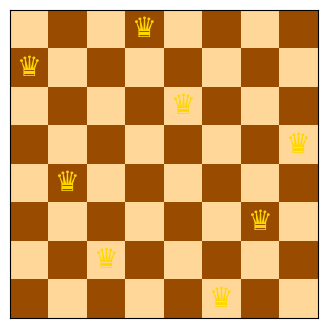

10-Queens Solution (GA): [7, 3, 10, 6, 1, 9, 5, 8, 2, 4]


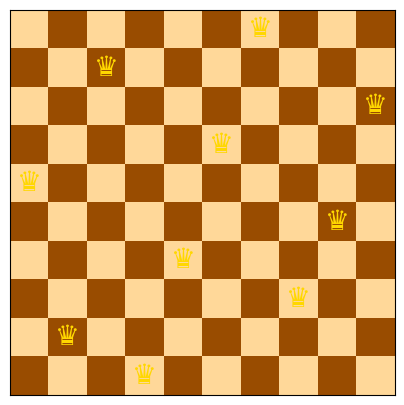

20-Queens Solution (GA): [12, 4, 11, 7, 20, 1, 17, 2, 6, 9, 15, 18, 14, 19, 5, 16, 13, 3, 10, 8]


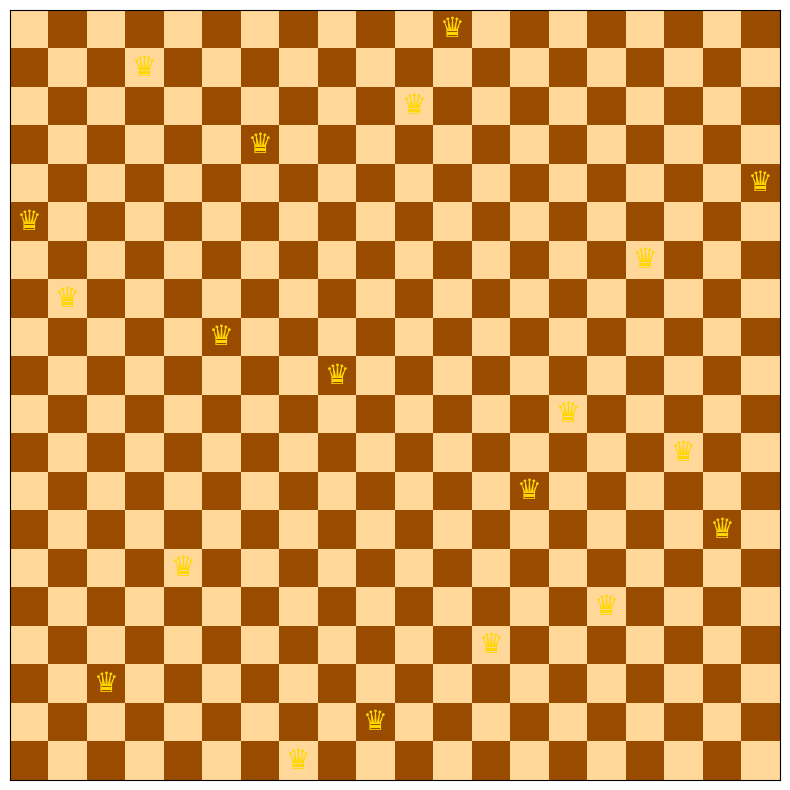

8-Queens Solution (A*): [1, 1, 1, 1, 1, 1, 1, 1]
A* States Explored: 8


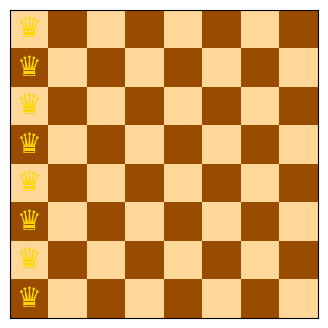


Comparison of GA vs A* for 8-Queens:
GA States Explored: 500
A* States Explored: 8


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import heapq

def fitness(chromosome):
    n = len(chromosome)
    max_fitness = n * (n - 1) // 2
    conflicts = 0

    for i in range(n):
        for j in range(i + 1, n):
            if abs(i - j) == abs(chromosome[i] - chromosome[j]):
                conflicts += 1

    return max_fitness - conflicts, conflicts

def generate_population(size, n):
    return [random.sample(range(1, n + 1), n) for _ in range(size)]

def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    return random.choices(population, probabilities, k=2)

def crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    child = [None] * n
    child[start:end] = parent1[start:end]

    remaining = [gene for gene in parent2 if gene not in child]
    index = 0

    for i in range(n):
        if child[i] is None:
            child[i] = remaining[index]
            index += 1

    return child

def mutate(chromosome, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(chromosome)), 2)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    return chromosome

def genetic_algorithm(n=8, pop_size=100, mutation_rate=0.1, generations=1000):
    population = generate_population(pop_size, n)
    states_explored = 0

    for generation in range(generations):
        fitness_results = [fitness(ch) for ch in population]
        fitness_scores = [f[0] for f in fitness_results]

        if max(fitness_scores) == n * (n - 1) // 2:
            break

        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
            new_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])

        population = sorted(population, key=lambda ch: fitness(ch)[0], reverse=True)[:2] + new_population
        states_explored += pop_size

    best_solution = max(population, key=lambda ch: fitness(ch)[0])
    return best_solution, states_explored

def visualize_board(solution):
    n = len(solution)
    board = np.zeros((n, n, 3))

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i, j] = [1.0, 0.85, 0.6]
            else:
                board[i, j] = [0.6, 0.3, 0.0]

    fig, ax = plt.subplots(figsize=(n/2, n/2))
    ax.imshow(board)

    for i in range(n):
        ax.text(solution[i] - 1, i, '♛', fontsize=20, ha='center', va='center', color='gold')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

def a_star_8_queens():
    n = 8
    initial_state = tuple(range(1, n + 1))
    heap = [(fitness(initial_state)[1], initial_state)]
    visited = set()
    states_explored = 0

    while heap:
        conflicts, state = heapq.heappop(heap)
        states_explored += 1

        if conflicts == 0:
            return list(state), states_explored

        if state in visited:
            continue
        visited.add(state)

        for i in range(n):
            for j in range(1, n + 1):
                if state[i] != j:
                    new_state = list(state)
                    new_state[i] = j
                    heapq.heappush(heap, (fitness(tuple(new_state))[1], tuple(new_state)))

    return None, states_explored

solution_8q_ga, ga_states = genetic_algorithm(n=8)
print("8-Queens Solution (GA):", solution_8q_ga)
print("GA States Explored:", ga_states)
visualize_board(solution_8q_ga)

solution_10q, _ = genetic_algorithm(n=10)
print("10-Queens Solution (GA):", solution_10q)
visualize_board(solution_10q)

solution_20q, _ = genetic_algorithm(n=20)
print("20-Queens Solution (GA):", solution_20q)
visualize_board(solution_20q)

solution_8q_a_star, a_star_states = a_star_8_queens()
print("8-Queens Solution (A*):", solution_8q_a_star)
print("A* States Explored:", a_star_states)
visualize_board(solution_8q_a_star)

print("\nComparison of GA vs A* for 8-Queens:")
print(f"GA States Explored: {ga_states}")
print(f"A* States Explored: {a_star_states}")